# Calculate the porphyrin dimensions

In [7]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


# Define and execute the simulation

,oxidation_proportion,percent_reduction
time (hr),,
0.000000,0.000000,0.000000
0.034483,0.082986,1.037326
0.068966,0.159087,1.988584
0.103448,0.228873,2.860913
0.137931,0.292869,3.660861
0.172414,0.351554,4.394428
0.206897,0.405369,5.067116
0.241379,0.454718,5.683979
0.275862,0.499972,6.249649


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,oxidation_proportion,percent_reduction
time (hr),,
0.000000,0.000000,0.000000
0.034483,0.082986,1.037326
0.068966,0.159087,1.988584
0.103448,0.228873,2.860913
0.137931,0.292869,3.660861
0.172414,0.351554,4.394428
0.206897,0.405369,5.067116
0.241379,0.454718,5.683979
0.275862,0.499972,6.249649


--> ERROR: The inquired reduction is never reached.
--> ERROR: The value was never observed in the simulation predictions.







,oxidation_proportion,percent_reduction
time (hr),,
0.000000,0.000000,0.000000
0.034483,0.158212,1.977653
0.068966,0.291397,3.642465
0.103448,0.403512,5.043903
0.137931,0.497890,6.223630
0.172414,0.577338,7.216723
0.206897,0.644215,8.052686
0.241379,0.700509,8.756367
0.275862,0.747897,9.348715


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,oxidation_proportion,percent_reduction
time (hr),,
0.000000,0.000000,0.000000
0.034483,0.158212,1.977653
0.068966,0.291397,3.642465
0.103448,0.403512,5.043903
0.137931,0.497890,6.223630
0.172414,0.577338,7.216723
0.206897,0.644215,8.052686
0.241379,0.700509,8.756367
0.275862,0.747897,9.348715


--> ERROR: The inquired reduction is never reached.
--> ERROR: The value was never observed in the simulation predictions.







,oxidation_proportion,percent_reduction
time (hr),,
0.000000,0.000000,0.000000
0.034483,0.288498,3.606230
0.068966,0.493776,6.172201
0.103448,0.639830,7.997871
0.137931,0.743746,9.296825
0.172414,0.817679,10.220993
0.206897,0.870283,10.878539
0.241379,0.907710,11.346370
0.275862,0.934338,11.679223


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,oxidation_proportion,percent_reduction
time (hr),,
0.000000,0.000000,0.000000
0.034483,0.288498,3.606230
0.068966,0.493776,6.172201
0.103448,0.639830,7.997871
0.137931,0.743746,9.296825
0.172414,0.817679,10.220993
0.206897,0.870283,10.878539
0.241379,0.907710,11.346370
0.275862,0.934338,11.679223


--> ERROR: The inquired reduction is never reached.
--> ERROR: The value was never observed in the simulation predictions.







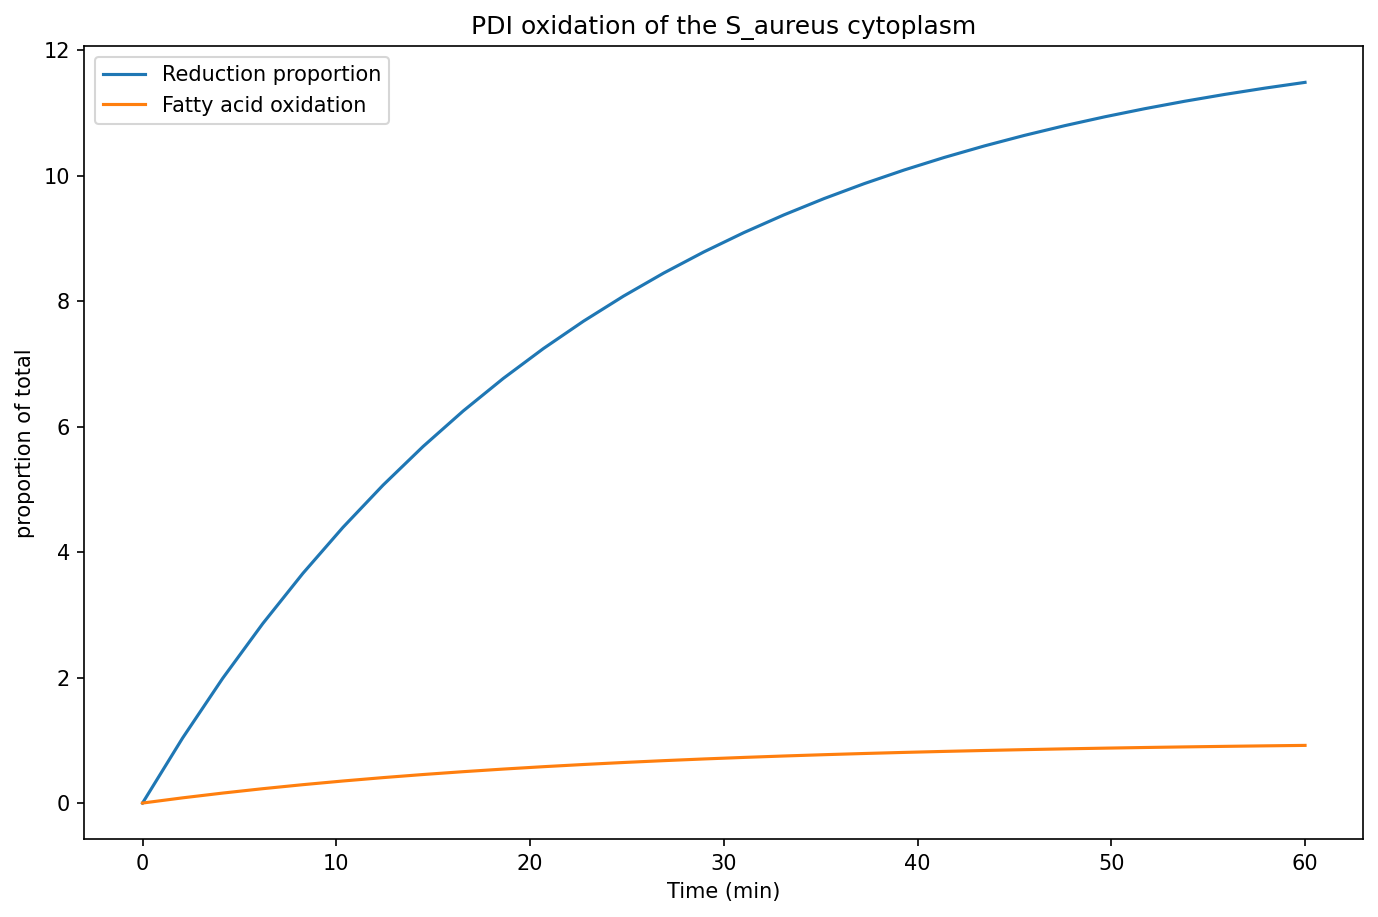

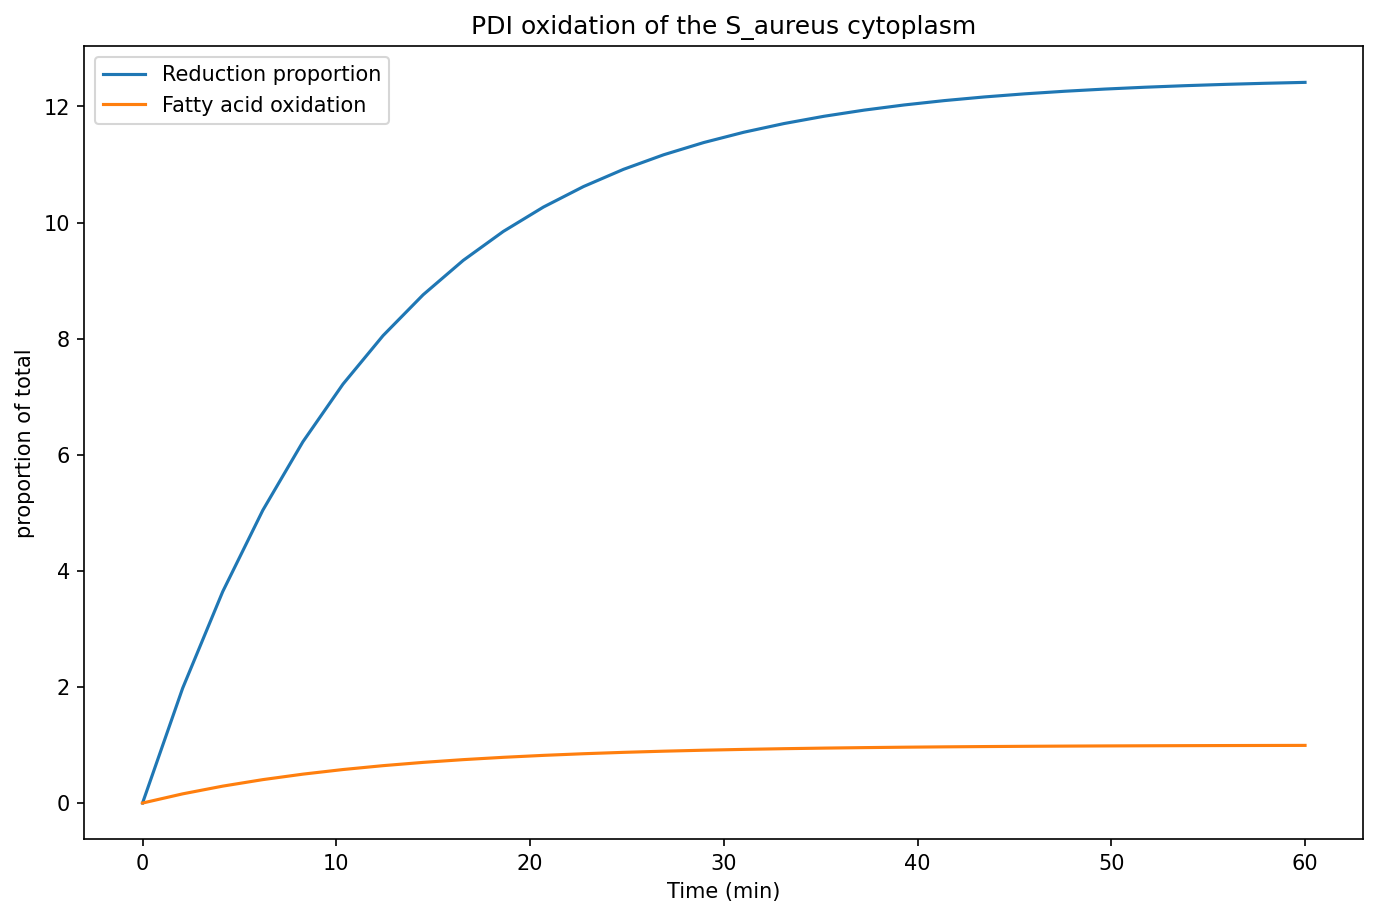

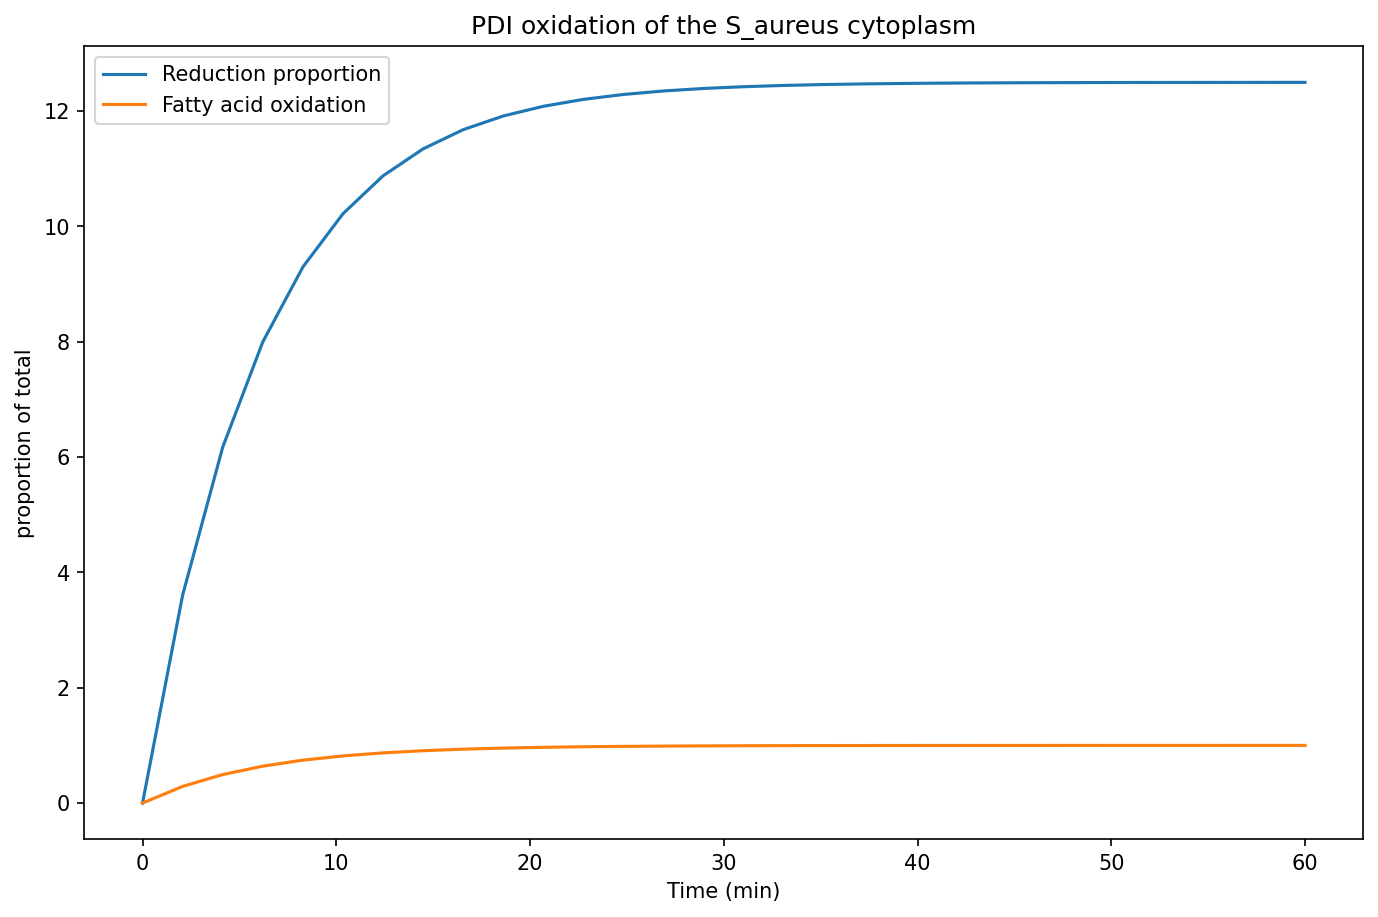

In [80]:
from scipy.constants import micro
from uncertainties import ufloat
%run ../../pdipy/core.py
%matplotlib inline

# define photosensitizer parameters
photosensitizer = {
    'name': '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide',
    'mw': {
        'value':1186.462   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}

# define the light parameters
irradiance = 4
light_source = {
    'name': 'OSRAM 2\' 18W/840 lamps',
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}


# define general parameters
verbose = False
jupyter = True
bacterial_cfu_ml = 1E8
timestep = 2
total_time = 60
bacterial_specie = 'S_aureus'
photosensitizer_molars = [5*micro, 10*micro, 20*micro]
simulation_name = 'Beirao_et_al, solution'

# execute the simulation
target_reduction = 1-10**(-7.6)
for photosensitizer_molar in photosensitizer_molars:
    pdi = PDIBacterialPkg(verbose, jupyter)
    pdi.define_system(timestep, total_time, bacterial_cfu_ml = bacterial_cfu_ml)
    pdi.define_bacterium(bacterial_specie)
    pdi.define_photosensitizer(photosensitizer, photosensitizer_molar)
    pdi.define_light(light_source, irradiance)
    pdi.singlet_oxygen_calculations()
    pdi.kinetic_calculation()
    processed_data = pdi.export(simulation_name)
    display(processed_data)

    # affirm the accuracy of the prediction
    value, unit = pdi.data_processing(target_reduction)    
    if value is not None:
        print(value, unit)
        actual_value = 1
        tolerance = actual_value*0.5
        acceptable_range = [actual_value-tolerance, actual_value+tolerance]
        acceptable_range_float = ufloat(actual_value, tolerance)
        if acceptable_range[0] < value < acceptable_range[1]:
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    else:
        print('--> ERROR: The value was never observed in the simulation predictions.')
    print('\n\n\n\n')